In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv("Amazon.csv")
df.head()




,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


#Top 5 most sell products with category


In [134]:
def most_sell_product_and_category(df):
  result=df.groupby('Category')['ProductName'].value_counts().sort_values(ascending=False).head()
  return result

In [135]:
most_sell_product_and_category(df)


,,count
Category,ProductName,
Electronics,Yoga Mat,383
Sports & Outdoors,LED Desk Lamp,380
Electronics,Portable SSD 1TB,377
Sports & Outdoors,Wireless Charger,376
Home & Kitchen,Portable SSD 1TB,374


<Axes: xlabel='Category,ProductName'>

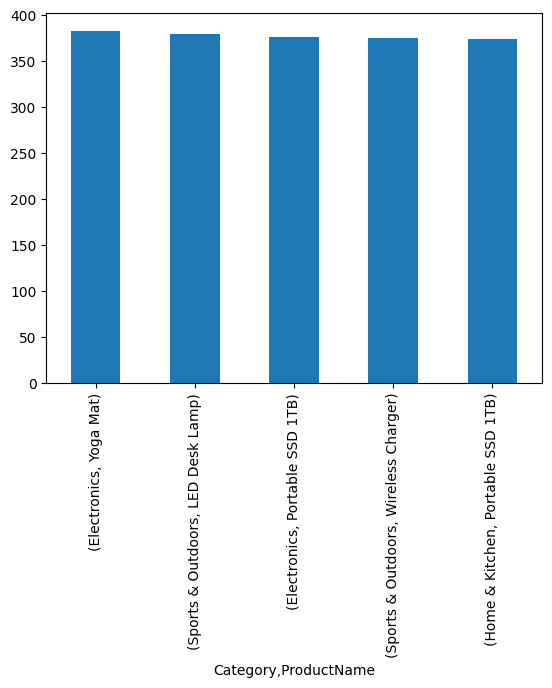

In [136]:
df.groupby('Category')['ProductName'].value_counts().sort_values(ascending=False).head().plot(kind='bar')

#Which Payment Method Most Used

In [104]:
df['PaymentMethod'].value_counts().sort_values(ascending=False)

,count
PaymentMethod,
Credit Card,35038
Debit Card,20024
UPI,15066
Amazon Pay,15017
Net Banking,9927
Cash on Delivery,4928


# Top 5 country Generate most Revenue

In [122]:
df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head()

,TotalAmount
City,
Charlotte,4747701.73
Dallas,4730108.67
San Jose,4669614.33
Seattle,4660962.17
Philadelphia,4650673.88


<Axes: xlabel='City'>

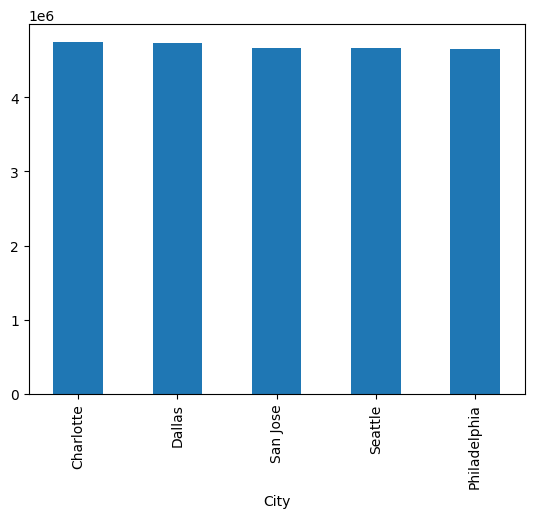

In [123]:
df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head().plot(kind='bar')

#Does Highest shipping cost cause of Cancellation?

In [106]:
df['cancelled']=df['OrderStatus'].apply(lambda x: 1 if x=='Cancelled' else 0)

In [107]:
df['Shipping_Bucket']=pd.cut(
    df['ShippingCost'],
    bins=[0,4,8,10,df['ShippingCost'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)

df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,cancelled,Shipping_Bucket
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,0,Low
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,0,Low
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,0,Medium
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,0,Medium
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,1,High


In [108]:
(df.groupby('Shipping_Bucket')['cancelled'].mean()*100).sort_values(ascending=False)

/tmp/ipython-input-3446184005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby('Shipping_Bucket')['cancelled'].mean()*100).sort_values(ascending=False)


,cancelled
Shipping_Bucket,
Low,3.110523
Very High,3.046750
Medium,2.981128
High,2.894799


/tmp/ipython-input-140141121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby('Shipping_Bucket')['cancelled'].mean()*100).plot(kind='bar')


<Axes: xlabel='Shipping_Bucket'>

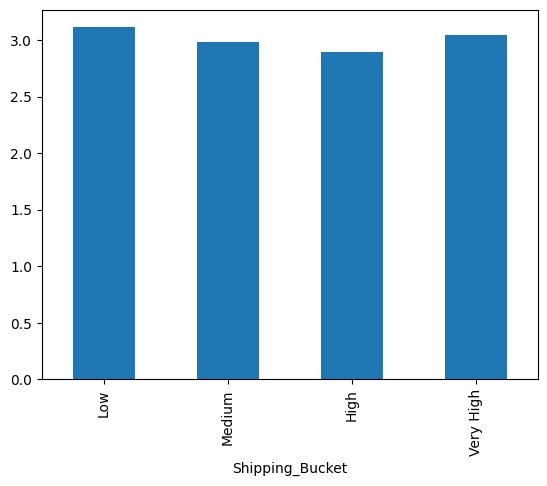

In [109]:
(df.groupby('Shipping_Bucket')['cancelled'].mean()*100).plot(kind='bar')


In [110]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,cancelled,Shipping_Bucket
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,0,Low
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,0,Low
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,0,Medium
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,0,Medium
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,1,High


#Which Seller GEnerate the Highest Revenue

In [111]:
df.groupby('SellerID')['TotalAmount'].sum().sort_values(ascending=False).head()

,TotalAmount
SellerID,
SELL00806,71283.67
SELL00440,71062.59
SELL01225,70785.92
SELL00709,70491.92
SELL00221,70446.50


#Top 5 Sellers Has Highst Cancellation Rate

In [112]:
cnc_rate=df.groupby('SellerID')['cancelled'].mean().sort_values(ascending=False).head()*100
cnc_rate

,cancelled
SellerID,
SELL00191,14.285714
SELL01239,12.765957
SELL01062,12.244898
SELL01615,12.195122
SELL01533,12.000000


<Axes: xlabel='SellerID'>

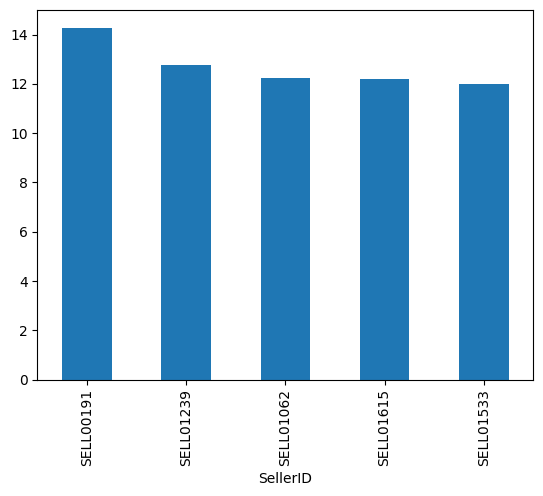

In [113]:
cnc_rate.plot(kind='bar')

#Which product Category Has Highest Cancellation Rate

In [127]:
(df.groupby('Category')['cancelled'].mean()*100).sort_values(ascending=False)

,cancelled
Category,
Electronics,3.227912
Toys & Games,3.095152
Home & Kitchen,3.058399
Books,2.984718
Sports & Outdoors,2.957629
Clothing,2.840805


<Axes: xlabel='Category'>

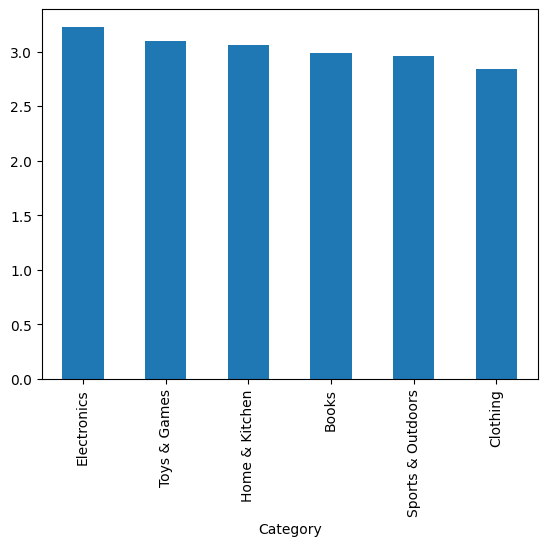

In [128]:
(df.groupby('Category')['cancelled'].mean()*100).sort_values(ascending=False).plot(kind='bar')

In [115]:
df.columns

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID', 'cancelled', 'Shipping_Bucket'],
      dtype='object')

In [116]:
df['Discount'].max()
df['Discount-Percentage']=df['Discount']*100
df['Discount-Percentage']
df.head()



,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,cancelled,Shipping_Bucket,Discount-Percentage
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,0,Low,0.0
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,0,Low,5.0
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,0,Medium,10.0
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,0,Medium,15.0
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,1,High,25.0


# Does Lowest Discount Cause of cancellation?

In [117]:
df['discount_bucket']=pd.cut(
    df['Discount-Percentage'],
    bins=[0,5,10,20,30,50,75,90],
    labels=['0-5%', '5-10%','10-20%', '20-30%', '30-50%', '50-75%', '75%+']

)

df.head()


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,PaymentMethod,OrderStatus,City,State,Country,SellerID,cancelled,Shipping_Bucket,Discount-Percentage,discount_bucket
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,Debit Card,Delivered,Washington,DC,India,SELL01967,0,Low,0.0,NaN
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,0,Low,5.0,0-5%
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,Debit Card,Delivered,Austin,TX,United States,SELL00908,0,Medium,10.0,5-10%
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,0,Medium,15.0,10-20%
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,1,High,25.0,20-30%


In [119]:
df['discount_bucket']=df['discount_bucket'].fillna('0-5%')
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,PaymentMethod,OrderStatus,City,State,Country,SellerID,cancelled,Shipping_Bucket,Discount-Percentage,discount_bucket
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,Debit Card,Delivered,Washington,DC,India,SELL01967,0,Low,0.0,0-5%
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,0,Low,5.0,0-5%
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,Debit Card,Delivered,Austin,TX,United States,SELL00908,0,Medium,10.0,5-10%
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,0,Medium,15.0,10-20%
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,1,High,25.0,20-30%


In [125]:
discount_cancel_rate = (
    df.groupby('discount_bucket')['cancelled']
      .mean() * 100
)

discount_cancel_rate.sort_values(ascending=False)


/tmp/ipython-input-846665766.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_bucket')['cancelled']


,cancelled
discount_bucket,
0-5%,3.083063
20-30%,3.025090
5-10%,3.024816
10-20%,2.847608
30-50%,NaN
50-75%,NaN
75%+,NaN


<Axes: xlabel='discount_bucket'>

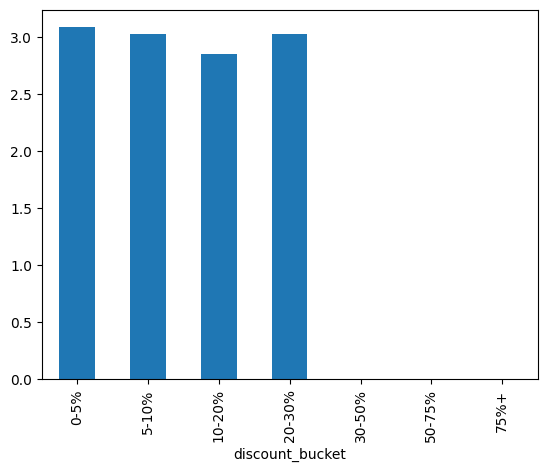

In [126]:
discount_cancel_rate.plot(kind='bar')